In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns

# 4-4 SVM(Support Vector Machine)

## 0. Îç∞Ïù¥ÌÑ∞ÏÖã ÏÜåÍ∞ú

### Gene expression

[Ïú†Ï†ÑÏûê Î∞úÌòÑ](https://www.kaggle.com/datasets/crawford/gene-expression) microarrayÎùºÎäî Ï∏°Ï†ï Î∞©Î≤ïÏùÑ ÏÇ¨Ïö©ÌïòÏó¨, Í∏âÏÑ± Í≥®ÏàòÏÑ± Î∞±ÌòàÎ≥ë ÌôòÏûêÏôÄ Í∏âÏÑ± Î¶ºÌîÑÍµ¨ÏÑ± Î∞±ÌòàÎ≥ëÌôòÏûêÎ•º ÎåÄÏÉÅÏúºÎ°ú Ïú†Ï†ÑÏûê Î∞úÌòÑÎèÑÎ•º Ï∏°Ï†ïÌïú Îç∞Ïù¥ÏÖãÏûÖÎãàÎã§.

Ìï¥Îãπ Îç∞Ïù¥ÌÑ∞Îäî Ï¥ù 7131Í∞úÏùò Ïª¨ÎüºÍ≥º 72Í∞úÏùò ÌñâÏùÑ Í∞ÄÏßÑ Îç∞Ïù¥ÌÑ∞Î°ú, ÌëúÎ≥∏Ïùò ÏàòÎ≥¥Îã§ ÏÜçÏÑ±Ïùò ÏàòÍ∞Ä Ìõ®Ïî¨ ÎßéÏùÄ Îç∞Ïù¥ÌÑ∞ÏÖãÏûÖÎãàÎã§.

Ï£ºÏöî Î≥ÄÏàò ÏÑ§Î™Ö

|Name|Description|
|----|---------|
|patient|patient no|
|cancer|AML: acute myeloid leukemia<br/>ALL:acute lymphoblastic leukemia|
|train|ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Ïó¨Î∂Ä|

Í∑∏Ïô∏ Î≥ÄÏàòÎäî Ïú†Ï†ÑÏûêÏùò Î∞úÌòÑÎèÑÎ•º Ï†ïÏàòÎ°ú ÎÇòÌÉÄÎÇ∏ Î≥ÄÏàòÎì§ ÏûÖÎãàÎã§.

In [2]:
df_gene = pd.read_csv('data/gene.csv', index_col='patient')
df_gene.head()

AFFX-BioB-5_at  AFFX-BioB-M_at  AFFX-BioB-3_at  AFFX-BioC-5_at  \
patient                                                                   
1                  -214            -153             -58              88   
2                  -139             -73              -1             283   
3                   -76             -49            -307             309   
4                  -135            -114             265              12   
5                  -106            -125             -76             168   

         AFFX-BioC-3_at  AFFX-BioDn-5_at  AFFX-BioDn-3_at  AFFX-CreX-5_at  \
patient                                                                     
1                  -295             -558              199            -176   
2                  -264             -400             -330            -168   
3                  -376             -650               33            -367   
4                  -419             -585              158            -253   
5                  -230             -284                4            -122   

         AFFX-CreX-3_at  AFFX-BioB-5_st  ...  U73738_at  X06956_at  X16699_at  \
patient                                  ...                                    
1                   252             206  ...       -125        389        -37   
2                   101              74  ...        -36        442        -17   
3                   206            -215  ...         33        168         52   
4                    49              31  ...        218        174       -110   
5                    70             252  ...         57        504        -26   

         X83863_at  Z17240_at  L49218_f_at  M71243_f_at  Z78285_f_at  cancer  \
patient                                                                        
1              793        329           36          191          -37     ALL   
2              782        295           11           76          -14     ALL   
3             1138        777           41          228          -41     ALL   
4              627        170          -50          126          -91     ALL   
5              250        314           14           56          -25     ALL   

         train  
patient         
1         True  
2         True  
3         True  
4         True  
5         True  

[5 rows x 7131 columns]

## 1. ÏÑ†Ìòï ÌåêÎ≥ÑÍ∏∞ (Linear Discriminant)

ÏÑ†Ìòï Ìï®ÏàòÏùò ÎåÄÏÜå Í¥ÄÍ≥ÑÎ°ú ÌÅ¥ÎûòÏä§Î•º Î∂ÑÎ•òÌïòÎäî Î™®Îç∏ÏûÖÎãàÎã§.

Ìï®Ïàò $f(x) = w^Tx + b$ 

> ÏñëÏùò ÌÅ¥ÎûòÏä§: $f(x) \ge 0$, 
>
> ÏùåÏùò ÌÅ¥ÎûòÏä§: $f(x) \lt 0$

Î°ú Î∂ÑÎ•òÎ•º Ìï©ÎãàÎã§.

In [3]:
df_toy = pd.DataFrame({
    'x1': [1.5, 2.5, 2, 3, 1, 4, 2, 3, 3.4, 2.5],
    'x2': [2, 4.2, 2, 4, 1, 2, 0, 0.8, 0.5, 1],
    'Class': [1, 1, 1, 1, 1, -1, -1, -1, -1, -1]
})

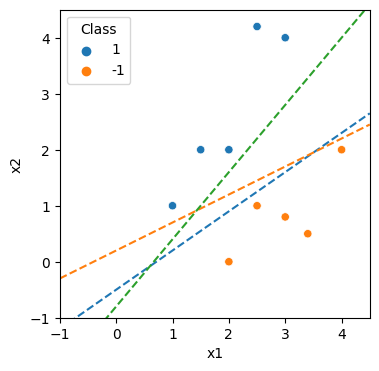

In [4]:
plt.figure(figsize=(4, 4))
sns.scatterplot(
    data=df_toy.assign(Class=lambda x: x['Class'].astype(str)), x='x1', y ='x2', hue='Class'
)
plt.gca().set_xlim(-1, 4.5)
plt.gca().set_ylim(-1, 4.5)
x1_range = np.array([-1, 4.5])
for i in [[0.7, -0.5], [0.5, 0.2], [1.2, -0.8]]:
    plt.plot(x1_range, i[0] * x1_range + i[1], linestyle='dashed')

plt.show()

## 2. ÏµúÎåÄ ÎßàÏßÑ Î∂ÑÎ•òÍ∏∞ (Maximal margin classifier)

ÏúÑÏôÄ Í∞ôÏù¥ ÏÑ†ÌòïÌåêÎ≥ÑÍ∏∞Î°ú Î∂ÑÎ•òÌï† Ïàò ÏûàÏùÑ Í≤ΩÏö∞Ïóê ÏôÑÎ≤ΩÌûà Positive ClassÏôÄ Negative ClassÎ•º Íµ¨Î∂ÑÌï† Ïàò ÏûàÎäî Î∂ÑÎ•òÍ∏∞Îäî ÎßéÏù¥ ÏûàÏäµÎãàÎã§.

Ïù¥ Ï§ëÏóêÏÑú Îëê ÌÅ¥ÎûòÏä§ÏôÄÏùò Í±∞Î¶¨Î•º ÏµúÎåÄÎ°ú ÌïòÎäî Î∂ÑÎ•ò ÌèâÎ©¥ÏùÄ Ïò§Î∂ÑÎ•òÎ•º ÏµúÎåÄÌïú Ï§ÑÏùº Ïàò ÏûàÏùÑ Í≤ÉÏù¥ÎùºÎäî ÏïÑÏù¥ÎîîÏñ¥ÏóêÏÑú ÏãúÏûëÌï©ÎãàÎã§.


### ÏµúÎåÄ ÎßàÏßÑ Î∂ÑÎ•òÍ∏∞Ïùò ÌïôÏäµ



ÏÑ†Ìòï ÌåêÎ≥Ñ Ìï®Ïàò

> $f(x) = w^Tx + b$

Ïùº Îïå, 

> ÏñëÏùò ÌÅ¥ÎûòÏä§: $f(x) \ge 0$, 
>
> ÏùåÏùò ÌÅ¥ÎûòÏä§: $f(x) \lt 0$

Îç∞Ïù¥ÌÑ∞Ïùò ÏàòÍ∞Ä ÏûÖÎ†• Î≥ÄÏàòÏùò ÏàòÎ≥¥Îã§ ÎßéÍ≥†, ÏôÑÏ†ÑÌûà Î∂ÑÎ•òÍ∞Ä Í∞ÄÎä•ÌïòÎã§Í≥† Í∞ÄÏ†ïÌï©ÎãàÎã§.

ÏµúÎåÄ ÎßàÏßÑ Î∂ÑÎ•òÍ∏∞Î•º Ï∞æÎäî Í≥ºÏ†ïÏùÑ Íµ¨Ï≤¥ÌôîÌïòÍ∏∞ ÏúÑÌï¥,

ÏµúÎåÄ ÎßàÏßÑ Î∂ÑÎ•òÍ∏∞Ïùò ÏµúÎåÄ ÎßàÏßÑÏùÑ ÌôïÎ≥¥Ìï®ÏúºÎ°úÏç® ÏñªÏñ¥ÏßÄÎäî Î∂ÑÎ•ò ÏòÅÏó≠ÏùÑ ÏïÑÎûòÏôÄ Í∞ôÏù¥ Í≥†Ï†ïÌï©ÎãàÎã§.

> ÏñëÏùò ÌÅ¥ÎûòÏä§: $f(x) \ge 1$, 
>
> ÏùåÏùò ÌÅ¥ÎûòÏä§: $f(x) \lt -1$

Î∂ÑÎ•ò Í∏∞Ï§ÄÏóêÏÑúÏùò ÎßàÏßÑÏùÑ **Î∂ÑÎ•ò ÎßàÏßÑ**Ïù¥Îùº Ï†ïÏùòÌï©ÎãàÎã§.

ÏúÑÏôÄ Í∞ôÏù¥ Î∂ÑÎ•ò ÎßàÏßÑÏùÑ 1Î°ú Ìïú Í≤ÉÏùÄ, ÌïôÏäµ Í≥ºÏ†ïÏùÑ Ï†ïÏùòÌïòÎäî Îç∞ Í∞ÑÌé∏Ìï®ÏùÑ Î∂ÄÏó¨ÌïòÍ∏∞ ÏúÑÌï®ÏûÖÎãàÎã§. 

Í≥†Ï†ïÎêú Î∂ÑÎ•ò ÎßàÏßÑÏóêÏÑú, ÏµúÎåÄ ÎßàÏßÑ Î∂ÑÎ•òÍ∏∞Îäî **Í∏∞ÌïòÌïôÏ†Å ÎßàÏßÑ**ÏùÑ ÏµúÎåÄÌôîÌïòÎäî ÏÑ†Ìòï Î∂ÑÎ•òÍ∏∞Î•º  ÏùòÎØ∏Ìï©ÎãàÎã§.

In [5]:
plt.figure(figsize=(4, 4))
plt.gca().set_xlim(-1, 4)
plt.gca().set_ylim(-1, 4)
sns.scatterplot(
    data=df_toy.assign(Class=lambda x: x['Class'].astype(str)), x='x1', y ='x2', hue='Class'
)
x1_range = np.array([-11, 4])

plt.plot(x1_range, 1 * x1_range - 0.78)
plt.plot(x1_range, 1 * x1_range - 0.78 + 0.75, linestyle='dashed', color='blue')
plt.plot(x1_range, 1 * x1_range - 0.78 - 0.75, linestyle='dashed', color='orange')

plt.show()

Î∂ÑÎ•ò ÎßàÏßÑÏùÑ 1Î°ú Í≥†Ï†ïÌïú ÏÉÅÌÉúÏóêÏÑú **Í∏∞ÌïòÌïôÏ†Å ÎßàÏßÑÏùÄ**

> $\frac{2}{||w||_2}$

ÏûÖÎãàÎã§.

------------------------
[Ïú†ÎèÑ Í≥ºÏ†ï]


$x^+$ÏôÄ $x^-$Îäî Îëê ÌèâÎ©¥ $w^Tx + b - 1 = 0$ÏôÄ $w^Tx + b + 1 = 0$ ÏúÑÏùò ÏµúÎã® Í±∞Î¶¨ ÏÉÅÏùò ÏßÅÏÑ†ÏùÑ ÏßÄÎÇòÎäî Ï†êÏù¥Îùº ÌïòÎ©¥,

$w^Tx^+ + b - 1 = 0$, $w^Tx^- + b + 1 = 0$ ÏûÖÎãàÎã§.

$w$Îäî Îëê ÌèâÎ©¥Ïóê ÏàòÏßÅÌïòÎäî Î≤°ÌÑ∞Ïù¥Í≥† $x^+$ÏôÄ $x^-$ Îäî ÎèôÏùº Î≤°ÌÑ∞ÏÉÅÏóê ÏûàÏúºÎØÄÎ°ú,

$x^+ = x^- + \lambda w$ ÏûÖÎãàÎã§. $\lambda$

> $distance(x^+, x^-) = ||x^+ - x^-||_2$
>
> $= ||x^- +\lambda w - x^-||_2 = ||\lambda w||_2$ --- (1)

Îëê ÏßÅÏÑ†Ïùò Î∞©Ï†ïÏãùÏùÑ ÌôúÏö©ÌïòÎ©¥,

> $w^T(x^- + \lambda w) + b - 1 = 0$
>
> $w^Tx^- + b - 1  + \lambda w^Tw = 0$
>
> $-2 + \lambda w^Tw = 0$
>
> $\lambda = \frac{2}{w^Tw}$ --- (2)

(1), (2)Î•º Í≤∞Ìï©ÌïòÎ©¥

> $distance(x^+, x^-) = \frac{2}{||w||_2}$

**[Ex.1]** 

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

Í∏∞ÌïòÌïôÏ†Å ÎßàÏßÑÏùÑ Íµ¨ÌïòÎäî Í≥µÏãùÏùÑ Ïù¥Ïö©ÌïòÏó¨ Îëê Í≤∞Ï†ï Í≤ΩÍ≥ÑÏóê ÏûàÎäî ÏûÑÏùòÏùò Ï†ê $x^+, x^-$ÏùÑ ÎèÑÏãùÌôî Ìï¥Î¥ÖÎãàÎã§.

```
w, b = np.array([-1.3333, 1.3333]), -0.75
```

ÏûÖÎãàÎã§.
    
</div>

In [6]:
w, b = np.array([-1.3333, 1.3333]), -0.75
x_minus = np.array([1, -0.5])
lam = 2 / np.dot(w.T, w) # (2)Î≤à ÏãùÏóêÏÑú ÎèÑÏ∂ú
x_plus = x_minus + lam * w
x_minus, x_plus, lam

(array([ 1. , -0.5]), array([0.24998125, 0.25001875]), 0.5625281260547227)

In [7]:
plt.figure(figsize=(4, 4))
plt.gca().set_xlim(-1, 4.5)
plt.gca().set_ylim(-1, 4.5)
sns.scatterplot(
    data=df_toy.assign(Class=lambda x: x['Class'].astype(str)), x='x1', y ='x2', hue='Class'
)
x1_range = np.array([-1, 4.5])

plt.plot(x1_range, 1 * x1_range - 0.75)
plt.plot(x1_range, 1 * x1_range - 0.75 + 0.75, linestyle='dashed', color='blue')
plt.plot(x1_range, 1 * x1_range - 0.75 - 0.75, linestyle='dashed', color='orange')
plt.plot(*x_minus, 'go')
plt.text(*(x_minus + np.array([0.1, -0.1])), '$x^-$')
plt.plot(*x_plus, 'go')
plt.text(*(x_plus + np.array([0.1, -0.1])), '$x^+$')
plt.gca().add_line(mlines.Line2D([x_plus[0], x_minus[0]], [x_plus[1], x_minus[1]], linestyle='dotted'))

plt.show()

Îî∞ÎùºÏÑú, ÏµúÎåÄ ÎßàÏßÑ Î∂ÑÎ•òÍ∏∞Ïùò ÌïôÏäµÏùÄ 


> ÏñëÏùò ÌÅ¥ÎûòÏä§: $w^Tx + b \ge 1$, 
>
> ÏùåÏùò ÌÅ¥ÎûòÏä§: $w^Tx + b \lt -1$ Ïùº Îïå, 
>
> Í∏∞ÌïòÌïôÏ†Å ÎßàÏßÑ $\frac{2}{||w||_2}$ ÏùÑ ÏµúÎåÄÌôîÌïòÎäî $w$Î•º Ï∞æÎäî Í≤ÉÏûÖÎãàÎã§.


Ïù¥Î•º Îçî Í∞ÑÌé∏Ìïú ÌòïÌÉúÎ°ú Ï†ïÎ¶¨ÌïòÎ©¥, 

> Î™®Îì† iÏóê ÎåÄÌï¥ $y_i(w^Tx_i + b) \ge 1$ Ïùº Îïå ($y_i \in \{-1, 1\}),$
>
> $\frac{1}{2}||w||_2^2$ Î•º ÏµúÏÜåÌôî

Ïó¨Í∏∞ÏÑú, 

> ÏñëÏùò ÌÅ¥ÎûòÏä§: $w^Tx + b \ge 1$, 
>
> ÏùåÏùò ÌÅ¥ÎûòÏä§: $w^Tx + b \lt -1$

ÏúÑÏóê ÏûàÎäî Ï†ê, Ï¶â Í≤∞Ï†ï Í≤ΩÍ≥ÑÎ©¥ ÏúÑÏóê ÏûàÎäî Ï†êÏùÑ **Support Vector** ÎùºÍ≥† Ìï©ÎãàÎã§.

-----------------------------

### Lagrange function & Lagrange Primal/Dual

ÏñëÏùò ÌÅ¥ÎûòÏä§: $w^Tx + b \ge 1$, 

ÏùåÏùò ÌÅ¥ÎûòÏä§: $w^Tx + b \lt -1$

ÏúÑ Ï°∞Í±¥Îì§ÏùÑ Ï∂©Ï°±ÏãúÎ©¥ÏÑú $\frac{1}{2}||w||_2^2$ ÏµúÏÜåÏ†êÏùÑ Ï∞æÎäî Í≤ÉÏùÄ Ïñ¥Î†µÏäµÎãàÎã§. 

wÏùò ÏµúÏ†ÅÏ†êÏùÄ Î™©Ï†Å Ìï®ÏàòÏóê ÏùòÌï¥ Ï†ïÌï¥ÏßÄÎäî Í≤∞Ï†ïÎêòÎäî Í≤å ÏïÑÎãàÎùº Ï°∞Í±¥Ïóê ÏùòÌï¥ Í≤∞Ï†ïÎê©ÎãàÎã§. 

Ï°∞Í±¥Îì§ÏóêÏÑú wÎ•º ÎèÑÏ∂úÌïòÍ∏∞ ÏúÑÌïú Î∞©Ìñ•ÏÑ±ÏùÑ ÏßÅÏ†ë Ï∂îÏ∂úÌïòÍ∏∞Í∞Ä Ïñ¥Î†µÍ∏∞ ÎïåÎ¨∏ÏûÖÎãàÎã§.

Î¨∏Ï†úÎ•º ÌíÄ Ïàò ÏûàÎäî ÌòïÌÉú, Ï¶â Ï°∞Í±¥ÏóêÏÑú wÏùò Î∞©Ìñ•ÏÑ±ÏùÑ Íµ¨Ìï† Ïàò ÏûàÎäî ÌòïÌÉú, Î∞îÍæ∏Ïñ¥ Í∞ÄÍ∏∞ ÏúÑÌï¥ ÏÇ¨Ïö©Îêú Í∞úÎÖêÏù¥ Lagrange Primal / Dual ÏûÖÎãàÎã§.

#### Lagrange Primal

Î∂ÄÎì±Ïãù Ï†úÏïΩ Ï°∞Í±¥Ïù¥ ÏûàÎäî ÏµúÏ†ÅÌôî Î¨∏Ï†úÎ•º Î∂ÄÎì±Ïãù Ï†úÏïΩÏùÑ Î™©Ï†ÅÌï®ÏàòÏóê Ìè¨Ìï®ÏãúÌÇ§Îäî Î∞©ÏãùÏúºÎ°ú Î¨∏Ï†úÎ°ú Î∞îÍøâÎãàÎã§. 

> $f_t(\theta)\ge0, i = 1,... n$ Ïùº Îïå,
>
> $J(\theta)$Î•º ÏµúÏÜåÌôî 

Lagrange functionÏùÑ $\theta$Ïóê ÎåÄÌï¥ÏÑúÎäî ÏµúÏÜåÌôîÌïòÍ≥†, $\alpha_i$Ïóê ÎåÄÌï¥ÏÑúÎäî ÏµúÎåÄÌôîÌïòÎäî Î¨∏Ï†úÎ°ú Î∞îÍæ∏Ïñ¥,

ÏµúÏ†ÅÌôî Í≥ºÏ†ïÏóêÏÑú Ï†úÏïΩ Ï°∞Í±¥Ïù¥ Ï∂©Ï°±ÎêòÎèÑÎ°ù ÌòïÌÉúÎ•º Î∞îÍøâÎãàÎã§.

> $L(\theta, \alpha)=J(\theta) - \sum_{i=1}^n\alpha_i f_t(\theta)$ : **Lagrange function**
>
> $max_{\alpha} \left(min_{\theta} L(\theta, \alpha)\right)$
>
> Lagrange multiplier: $\alpha_i$, $\alpha_i \ge 0$, i=1,...,n

Ïù¥Îü¨Ìïú ÌòïÌÉúÏùò Î¨∏Ï†úÎ•º Lagrangian Primal Ïù¥ÎùºÍ≥† Ìï©ÎãàÎã§.

#### Lagrange Dual

ÏµúÏÜåÌôîÏôÄ ÏµúÎåÄÌôî ÎèôÏãúÏóê Îëê Í∞úÏùò ÏµúÏ†ÅÌôî Í≥ºÏ†ïÏù¥ ÏûàÏúºÎØÄÎ°ú, Ïù¥ ÎòêÌïú Ïñ¥Î†µÏäµÎãàÎã§.

ÏïÑÎûòÏùò KKT(Karush-Kuhn-Tucker) Ï°∞Í±¥ÏùÑ Ï∂©Ï°±ÏãúÌÇ§Î©¥, 

$\theta$Ïóê ÎåÄÌïú ÏµúÏÜåÌôî ÏöîÍ±¥ÏùÄ $\alpha_i$Ïóê ÎåÄÌïú ÏµúÎåÄÌôî Î¨∏Ï†úÎ°ú Î∞îÍøÄ Ïàò ÏûàÏäµÎãàÎã§.(Lagrangian Dual)

> (1) $\frac{\partial{L(\theta, \alpha)}}{\partial\theta}=0$
>
> (2) $f_i(\theta) \ge 0, i=1, ... n$
>
> (3) $\alpha_i \ge 0, i=1, ... n$
>
> (4) $\alpha_if_t(\theta) = 0, i=1, ... n$

(1) (2) (3) (4) ÎßåÏ°±ÌïúÎã§Î©¥,

> $max_{\alpha} \left(L(\theta, \alpha)\right)$


------------------------------------
ÏµúÎåÄ ÎßàÏßÑ Î∂ÑÎ•òÍ∏∞Ïùò ÏµúÏ†ÅÌôî ÏöîÍ±¥ÏùÄ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.

> Î™®Îì† iÏóê ÎåÄÌï¥ $y_i(w^Tx_i + b) \ge 1$ Ïùº Îïå, ($y_i \in \{-1, 1\}),$  
>
> $\frac{1}{2}||w||_2^2$ Î•º ÏµúÏÜåÌôî

Langrangian Primal ÌòïÌÉúÎ°ú Î≥ÄÌôò, 


> $L(w, b, \alpha) = \frac{1}{2}||w||_2^2 - \sum_{i=1}^n\alpha_i\left(y_i(w^Tx_i + b) - 1\right)$
>
> $max_{\alpha}min_{w, b}\left(L(w, b, \alpha)\right)$
>
> $\alpha_i \ge 0$, i=1,...,n

Langrangian DualÎ•º Ï†ÅÏö©Ìï©ÎãàÎã§.

Ïù¥Î•º ÏúÑÌï¥ÏÑúÎäî KKT Ï°∞Í±¥ÏùÑ ÎßåÏ°±Ìï¥Ïïº Ìï©ÎãàÎã§.

KKT Ï°∞Í±¥ÏùÄ

> $\frac{\partial{L(w, b, \alpha)}}{\partial{w}} = 0$ --- (5)
>
> $\frac{\partial{L(w, b, \alpha)}}{\partial{b}} = 0$ --- (6)
>
> $y_i(w^Tx_i + b) - 1 \ge 0, i=1, ... n$ --- (7)
>
> $\alpha_i \ge 0, i=1, ... n$ --- (8)
>
> $\alpha_i\left(y_i(w^Tx_i + b) - 1\right) = 0, i=1, ... n$ --- (9)


(5)Îäî $L(w, b, \alpha)$Ïù¥ $w$Ïóê ÎåÄÌï¥ÏÑúÎäî Convex Î¨∏Ï†úÏù¥Í∏∞ ÎïåÎ¨∏Ïóê $w$Ïóê ÎåÄÌï¥ÏÑú ÏµúÏ†ÅÏ†êÏù¥Í∏∞ÎèÑ Ìï©ÎãàÎã§.


(5)Î•º ÌíÄÎ©¥, 

> $w - \sum_{i=1}^n\alpha_iy_ix_i = 0$
>
> $w = \sum_{i=1}^n\alpha_iy_ix_i$ ---(8)

(6)ÏùÑ ÌíÄÎ©¥, 

> $\sum_{i=1}^n\alpha_iy_i = 0$ ---(9)

$L(w, b, \alpha)$Ïóê (8)ÏùÑ Ï†ÅÏö©Ìï©ÎãàÎã§.

> $L(w, b, \alpha) = \frac{1}{2}||w||_2^2 - \sum_{i=1}^n\alpha_i\left(y_i(w^Tx_i + b) - 1\right)$
>
> $L(w, b, \alpha) = \frac{1}{2}\left(\sum_{i=1}^n\alpha_iy_ix_i\right)^T\left(\sum_{j=1}^n\alpha_jy_jx_j\right) - \sum_{i=1}^n\alpha_i\left(y_i(\left(\sum_{j=1}^n\alpha_jy_jx_j\right)^Tx_i + b) - 1\right)$
>
> $ = \frac{1}{2}\sum_{i=1}^n\sum_{j=1}^n\alpha_i\alpha_jy_iy_jx_j^Tx_i - \sum_{i=1}^n\sum_{j=1}^n\alpha_i\alpha_jy_iy_jx_j^Tx_i - \sum_{i=1}^n\left(\alpha_iy_ib - \alpha_i\right)$
>
> $ = -\frac{1}{2}\sum_{i=1}^n\sum_{j=1}^n\alpha_i\alpha_jy_iy_jx_j^Tx_i - \sum_{i=1}^n\left(\alpha_iy_ib - \alpha_i\right)$

(9)Î•º Ï†ÅÏö©Ìï©ÎãàÎã§.

> $ = \sum_{i=1}^n\alpha_i - \frac{1}{2}\sum_{i=1}^n\sum_{j=1}^n\alpha_i\alpha_jy_iy_jx_i^Tx_j$


Ïù¥Î°úÏç® SVMÏùò ÌïôÏäµÏùÄ ÏïÑÎûòÏóêÏÑú ÏµúÏ†ÅÏùò $\alpha_i, i = 1, ... n$Î•º Íµ¨ÌïòÎäî Î¨∏Ï†úÎ°ú Ï†ïÎ¶¨Îê©ÎãàÎã§.

> $L(\alpha) = max_{\alpha} \left(\sum_{i=1}^n\alpha_i - \frac{1}{2}\sum_{i=1}^n\sum_{j=1}^n\alpha_i\alpha_jy_iy_jx_i^Tx_j\right)$

where, 

> $\sum_{i=1}^n\alpha_iy_i = 0 \ldots(9)$
>
> $w = \sum_{i=1}^n\alpha_iy_ix_i \ldots(8)$
>
> $y_i(w^Tx_i + b) - 1 \ge 0, i=1, ... n \ldots(7)$
>
> $\alpha_i \ge 0, i=1, ... n \ldots(3)$
>
> $\alpha_i\left(y_i(w^Tx_i + b) - 1\right) = 0, i=1, ... n \ldots(4)$

KKTÏùò Ï°∞Í±¥ÏùÑ Í≥†Ï∞∞ÌïòÎ©¥, $\alpha_i$ ÎòêÎäî $y_i(w^Tx_i + b) - 1$ Îëò Ï§ëÏùò ÌïòÎÇòÎäî Î∞òÎìúÏãú 0Ïù¥Ïñ¥Ïïº Ìï©ÎãàÎã§.

$\alpha$**Îäî Support Vector Ïó¨Î∂ÄÎ•º ÎÇòÌÉÄÎÉÖÎãàÎã§.**

$\alpha_i = 0$Ïù¥Î©¥, $y_i(w^Tx_i + b) - 1 > 0$ Ïù¥ÎùºÎèÑ (4)Î•º ÎßåÏ°±ÏãúÏºú KKT Ï°∞Í±¥Ïóê Ïñ¥Í∏ãÎÇòÏßÄ ÏïäÏäµÎãàÎã§.

$y_i(w^Tx_i + b) - 1 = 0$ Ïùº Í≤ΩÏö∞Îäî $\alpha_i > 0$Ïù¥ÎùºÎèÑ (4)Î•º ÎßåÏ°±ÏãúÏºú KKT Ï°∞Í±¥Ïóê Ïñ¥Í∏ãÎÇòÏßÄ ÏïäÏäµÎãàÎã§.

Îã§Ïãú ÎßêÌï¥ $\alpha_i > 0$ Ïù¥Î©¥, ÌôïÏã§Ìûà iÎäî Í≤∞Ï†ï Í≤ΩÍ≥ÑÏóê ÏûàÎäî Ï†êÏù¥Í≥† Ï¶â **Support Vector**Ïù∏ Í≤ÉÏûÖÎãàÎã§.

---------------------------------------------------

ÏµúÎåÄ ÎßàÏßÑ Î∂ÑÎ•òÍ∏∞Ïùò ÌïôÏäµÏùÄ ÏÑ†ÌòïÏúºÎ°ú Î∂ÑÎ¶¨Í∞Ä Í∞ÄÎä•Ìïú Î∂ÑÎ•ò Îç∞Ïù¥ÌÑ∞ÏÖãÏóê ÎåÄÌï¥ÏÑúÎßå Í∞ÄÎä•Ìï©ÎãàÎã§.

Ïù¥Îü¨Ìïú ÌïúÍ≥ÑÏ†êÏùÑ Í∑πÎ≥µÌïòÍ∏∞ ÏúÑÌï¥ Îëê Í∞ÄÏßÄ Ï†ëÍ∑ºÎ≤ïÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.

1. Î∂ÑÎ¶¨Í∞Ä Í∞ÄÎä•ÌïòÏßÄ ÏïäÎäî Îç∞Ïù¥ÌÑ∞ÏóêÏÑúÎèÑ Ï†ÅÏö©Ìï† Ïàò ÏûàÎèÑÎ°ù Îã§Ïùå Î∂ÑÎ¶¨ Ï°∞Í±¥Ïóê ÎåÄÌïú ÏôÑÌôî

> Î™®Îì† iÏóê ÎåÄÌï¥ $y_i(w^Tx_i + b) \ge 1$ Ïùº Îïå ($y_i \in \{-1, 1\}),$ 

2. Î∂ÑÎ¶¨Í∞Ä ÎêòÎèÑÎ°ù Îç∞Ïù¥ÌÑ∞Î•º Î≥ÄÌòïÌïòÎäî Î∞©Î≤ï

Ï≤´ Î≤àÏß∏ Ï†ëÍ∑ºÎ≤ïÏù¥ **ÏÜåÌîÑÌä∏ ÎßàÏßÑ Î∂ÑÎ•òÍ∏∞**Ïù¥Í≥†, Îëê Î≤àÏß∏ Ï†ëÍ∑ºÎ≤ïÏù¥ **Ïª§ÎÑê Ìï®Ïàò**Î•º ÌÜµÌïú Í≥†Ï∞®Ïõê Î≤°ÌÑ∞Î°ú Î≥ÄÌôòÌïòÎäî Î∞©Î≤ïÏûÖÎãàÎã§.

## 3. ÏÜåÌîÑÌä∏ ÎßàÏßÑ Î∂ÑÎ•òÍ∏∞

ÏµúÎåÄ ÎßàÏßÑ Î∂ÑÎ•òÍ∏∞ÏóêÏÑú ÏïÑÎûòÏôÄ Í∞ôÏù¥ 

> Î™®Îì† iÏóê ÎåÄÌï¥ $y_i(w^Tx_i + b) - 1 + \xi_i \ge 0$ Ïùº Îïå, ($y_i \in \{-1, 1\}),$  
>
> Î™®Îì† iÏóê ÎåÄÌï¥ $\xi_i \ge 0$
>
> $\frac{1}{2}||w||_2^2 + C\sum_{i=1}^n\xi_i$Î•º ÏµúÏÜåÌôî

Langrangian PrimalÏùÄ


> $L(w, b, \xi, \alpha, \gamma) = \frac{1}{2}||w||_2^2 + C\sum_{i=1}^n\xi_i - \sum_{i=1}^n\alpha_i\left(y_i(w^Tx_i + b) - 1 + \xi_i\right) - \sum_{i=1}^n\gamma_i\xi_i$
>
> $max_{\alpha, \gamma}min_{w, b, \xi}\left(L(w, b, \xi, \alpha, \gamma)\right)$
>
> $\alpha_i \ge 0$, i=1,...,n, $\gamma_i \ge 0$, i=1,...,n

Langrangian DualÎ•º Ï†ÅÏö©Ìï©ÎãàÎã§.

KKT Ï°∞Í±¥ÏùÄ

> $\frac{\partial{L(w, b, \xi, \alpha, \gamma)}}{\partial{w}} = 0$
>
> $\frac{\partial{L(w, b, \xi, \alpha, \gamma)}}{\partial{b}} = 0$
>
> $\frac{\partial{L(w, b, \xi, \alpha, \gamma)}}{\partial{\xi_i}} = 0$ --- (10)
>
> $y_i(w^Tx_i + b) - 1 + \xi_i \ge 0, i=1, ... n$
>
> $w = \sum_{i=1}^n\alpha_iy_ix_i$
>
> $\alpha_i \ge 0, i=1, ... n$
>
> $\alpha_i\left(y_i(w^Tx_i + b) - 1 + \xi_i \right) = 0, i=1, ... n$
>
> $\gamma_ùëñ\xi_ùëñ = 0, i=1, ... n$

(10)ÏóêÏÑú  $\alpha_i = C - \gamma_i$ Í∞Ä Ïú†ÎèÑÎê©ÎãàÎã§.

$\gamma_i > 0$Ïù¥Î©¥ $\xi_i = 0$Ïù¥ Îê† Ïàò ÏûàÏäµÎãàÎã§. ÌïòÏßÄÎßå $\gamma_i = 0$ Ïù¥Î©¥, $\xi_i > 0$ ÏûÖÎãàÎã§.

Ïó¨Í∏∞ÏÑú ÏïÑÎûòÏôÄ Í∞ôÏùÄ Í¥ÄÍ≥ÑÍ∞Ä Ïú†ÎèÑÍ∞Ä Îê©ÎãàÎã§.

> $\alpha_i = 0$ Ïù¥Î©¥ $\gamma_i = C, \xi_i = 0$ Ïù∏ ÏµúÎåÄ ÎßàÏßÑ Î∞îÍπ• Ï™ΩÏùò Îç∞Ïù¥ÌÑ∞ ÏûÖÎãàÎã§.
>
> $0 < \alpha_i < C$ Ïù¥Î©¥ $\gamma_i > 0, \xi_i = 0$ Ïù∏ ÏµúÎåÄ ÎßàÏßÑ ÏúÑÏùò Ï†êÏù∏ **Support Vector** ÏûÖÎãàÎã§.. 
>
> $\alpha_i = C$ Ïù¥Î©¥ $\gamma_i = 0, \xi_i > 0$ Ïù∏ ÏµúÎåÄ ÎßàÏßÑ Ïïà Ï™ΩÏóê Ï†êÏù∏ **Support Vector** ÏûÖÎãàÎã§..

Ïù¥Î°úÏç® SVMÏùò ÌïôÏäµÏùÄ ÏµúÏ†ÅÏùò $\alpha_i, i = 1, ... n$Î•º Íµ¨ÌïòÎäî Î¨∏Ï†úÍ∞Ä Îê©ÎãàÎã§.

> $L(\alpha) = max_{\alpha} \left(\sum_{i=1}^n\alpha_i - \frac{1}{2}\sum_{i=1}^n\sum_{j=1}^n\alpha_i\alpha_jy_iy_jx_i^Tx_j\right)$

where, 

> $\sum_{i=1}^n\alpha_iy_i = 0$
>
> $w = \sum_{i=1}^n\alpha_iy_ix_i$
>
> $y_i(w^Tx_i + b) - 1 + \xi_i \ge 0, i=1, ... n$
>
> $0 \le \alpha_i \le C , i=1, ... n$
>
> $\alpha_i\left(y_i(w^Tx_i + b) - 1 + \xi_i\right) = 0, i=1, ... n$



## 4. Ïª§ÎÑê(Kernel)

Îç∞Ïù¥ÌÑ∞Î•º Í≥†Ï∞®Ïõê Í≥µÍ∞ÑÏúºÎ°ú Îß§ÌïëÌïòÏó¨ ÏÑ†Ìòï Î∂ÑÎ¶¨ Í∞ÄÎä•Ìïú ÏÉÅÌÉúÎ°ú Î≥ÄÌôòÌïòÎäî Ìï®ÏàòÏûÖÎãàÎã§.

Ïòà) $x_1, x_2$ ‚Üí $x_1, x_2, x_1x_2, x_1^2, x_1^2$

image.png

‚ÄªÏù¥ÎØ∏ÏßÄ Ï∂úÏ≤ò: https://medium.com/@Suraj_Yadav/what-is-kernel-trick-in-svm-interview-questions-related-to-kernel-trick-97674401c48d

Ïù¥Îü¨Ìïú Í≥†Ï∞®Ïõê Í≥µÍ∞ÑÏùò Îß§ÌïëÏùÄ Î≥ÄÏàòÏùò ÏàòÍ∞Ä ÎßéÏïÑÏßà ÏàòÎ°ù, ÌååÏÉùÎêòÎäî Î≥ÄÏàòÏùò ÏàòÎäî Ìõ®Ïî¨ ÎßéÏïÑÏßëÎãàÎã§. Ïù¥Ïóê ÎåÄÏùëÌïòÍ∏∞ ÏúÑÌï¥ Ïª§ÎÑê Ìä∏Î¶≠(kernel trick)Ïù¥ ÏÇ¨Ïö©Îê©ÎãàÎã§. Ïù¥Î•º Ïù¥Ïö©ÌïòÎ©¥ ÏßÅÏ†ë Í≥†Ï∞®Ïõê Îß§Ìïë Î≥ÄÏàòÎ•º ÎßåÎì§ÏßÄ ÏïäÏïÑÎèÑ Ïª§ÎÑêÏùÑ Ï†ÅÏö©Ìï† Ïàò ÏûàÏäµÎãàÎã§.

#### Ïª§ÎÑê Ìä∏Î¶≠(Kernel trick)

ÌïôÏäµÍ≥º ÏòàÏ∏°Ïóê ÌïÑÏöîÌïú Í≤ÉÏùÄ ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤¥Í∞Ä ÏïÑÎãàÎùº ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞Ïùò ÎÇ¥Ï†Å($x_i^Tx_i$) ÏûÖÎãàÎã§.

- ÌïôÏäµÏãú,

> $L(\alpha) = max_{\alpha} \left(\sum_{i=1}^n\alpha_i - \frac{1}{2}\sum_{i=1}^n\sum_{j=1}^n\alpha_i\alpha_jy_iy_jx_i^Tx_j\right)$


- ÏòàÏ∏°Ïãú, 

> $w = \sum_{i=1}^n\alpha_iy_ix_i$ 
>
> $f(x) = w^Tx + b$ 
>
> ‚Üí $ f(x) = \sum_{i=1}^n\alpha_iy_ix_i^Tx + b$

Ïù¥Ï†êÏóê Ï∞©ÏïàÌïòÏó¨, ÎÇ¥Ï†ÅÌïòÍ∏∞ Ï†ÑÏóê Í≥†Ï∞®Ïõê Îß§Ìïë Î≥ÄÏàòÎ•º ÎßåÎìúÎäîÍ≤å ÏïÑÎãàÎùº, 

ÎÇ¥Ï†ÅÌïú Í∞íÏóê Kernel Ìï®ÏàòÎ•º Ï†ÅÏö©ÌïòÏó¨ Í≥†Ï∞®Ïõê Îß§ÌïëÌö®Í≥ºÎ•º ÏñªÎäî Í≤ÉÏùÑ Ïù¥Ïö©Ìï©ÎãàÎã§.


Í∞ÄÎ†π,

$\mathbf{a} = \begin{bmatrix} a_0 \\ a_1 \\ \vdots \\ a_n \end{bmatrix}$, $\mathbf{b} = \begin{bmatrix} b_0 \\ b_1 \\ \vdots \\ b_n \end{bmatrix}$

$a^Tb = (a_0b_0 + a_1b_1 + ... + a_nb_n)$ ÏûÖÎãàÎã§. 

$\phi(x)$Î•º 2Ï∞® ÎèôÏ∞® Îã§Ìï≠ Î≥ÄÌôòÏù¥ÎùºÎ©¥,

$\mathbf{\phi(a)} = \begin{bmatrix} a_0^2 \\ a_0a_1 \\ \vdots \\ a_n^2 \end{bmatrix}$, $\mathbf{\phi(b)} = \begin{bmatrix} b_0^2 \\ b_0b_1 \\ \vdots \\ b_n^2 \end{bmatrix}$

$\phi(a)^T\phi(b) = (a_0^2b_0^2 + a_0a_1b_0b_1 + ... a_n^2b_n^2)$

$\left(a^Tb\right)^2 = (a_0b_0 + a_1b_1 + ... + a_nb_n)(a_0b_0 + a_1b_1 + ... + a_nb_n) = a_0^2b_0^2 + 2a_0a_1b_0b_1 + ... + a_n^2b_n^2$ 

Ï¶â, $\phi(x_i^T)phi(x_i)$ ‚Üí $\phi'(x_i^Tx_i)$ ÎèôÏùºÌïú Ìö®Í≥ºÎ•º ÏñªÏùÑ Ïàò ÏûàÎäî Í≥†Ï∞®Ìï≠ Îß§ÌïëÏùÑ Íµ¨ÏÑ±Ìï† Ïàò ÏûàÏäµÎãàÎã§.


#### Ïª§ÎÑê(Kernel)Ïùò Ï¢ÖÎ•ò Î∞è ÌäπÏßï

|Ïª§ÎÑêÎ™Ö|Ïª§ÎÑê Ìï®Ïàò|ÌäπÏßï|
|----:|:---:|:----|
|ÏÑ†Ìòï Ïª§ÎÑê(Linear kernel)|$$x_i \cdot x_j$$|SVM Î™®Îç∏ÏùÄ ÏÑ†ÌòïÏùò Í≤∞Ï†ï Ìï®ÏàòÎ°ú ÎÇòÌÉÄÎÇº Ïàò ÏûàÏäµÎãàÎã§.|
|ÎèôÏ∞® Îã§Ìï≠ Ïª§ÎÑê(Homogeneous polynomial kernel)|$$\left(x_i \cdot x_j\right)^d$$|Î™®Îì† Ìï≠Ïùò Ï∞®ÏàòÍ∞Ä dÏù∏ Îã§Ìï≠ Î≥ÄÌôòÏù¥ Îê©ÎãàÎã§.|
|ÎπÑÎèôÏ∞® Îã§Ìï≠ Ïª§ÎÑê(Inhomogeneous polynomial kernel)|$$\left(x_i \cdot x_j + r\right)^d$$|Ìï≠Ïùò Ï∞®ÏàòÍ∞Ä dÎ≥¥Îã§ ÏûëÏùÄ Îã§Ìï≠ Î≥ÄÌôòÏù¥ Îê©ÎãàÎã§.|
|Í∞ÄÏö∞ÏãúÏïà Î∞©ÏÇ¨ Í∏∞Ï†Ä Ìï®Ïàò Ïª§ÎÑê(Gaussian Radial Base Function kernel)|$$exp^{-\gamma||x_i - x_j||^2}, \gamma > 0, Ï£ºÎ°ú \gamma=1/(2\sigma^2) $$<br> $\gamma$Í∞Ä ÌÅ¥ ÏàòÎ°ù Î≥µÏû°Ìïú Í≤ΩÍ≥ÑÎ©¥Ïù¥ ÏÉùÍπÅÎãàÎã§. Î™®Îç∏Ïùò Ìé∏Ìñ•Ïù¥ ÎÇÆÏïÑ ÏßëÎãàÎã§|Î¨¥Ìïú Ï∞®ÏàòÏùò Îã§Ìï≠ Ïª§ÎÑêÏùò Ìï©Í≥º Í∞ôÏùÄ ÌòïÌÉúÏùò Î≥ÄÌôòÏù¥ Îê©ÎãàÎã§.|
|ÏãúÍ∑∏Î™®Ïù¥Îìú Ìï®Ïàò Ïª§ÎÑê(Sigmoid function kernel)|$$tanh(\kappa x_i \cdot x_j + c), \kappa > 0, c < 0$$||


#### Ïª§ÎÑê Ìï®ÏàòÏùò Í∏∞Î≥∏ ÏöîÍ±¥

1. Ïª§ÎÑê ÌñâÎ†¨ÏùÄ ÏñëÏùò Ï§ÄÏ†ïÎ∂ÄÌò∏(positive semidefinite, Î™®Îì† Î≤°ÌÑ∞ zÏóê ÎåÄÌï¥ $z^TKz \ge 0$)Ïù¥Ïñ¥Ïïº Ìï©ÎãàÎã§.


2. MercerÏùò Ï†ïÎ¶¨(Merger's theorem): Ïª§ÎÑê Ìï®Ïàò K(x, y) Îäî Îã§ÏùåÍ≥º Í∞ôÏùÄ ÏàòÏãùÏùÑ ÎßåÏ°±Ìï©ÎãàÎã§.

> $\int_{X \times X} |K(x, y)|^2 \, d\mu(x) \, d\mu(y) < \infty$


## 5. SVM(Support Vector Machine)

ÏÜåÌîÑÌä∏ ÎßàÏßÑ Î∂ÑÎ•òÍ∏∞(Soft Margin Classifier) + Ïª§ÎÑê(Kernel)Ïùò Îëê Í∞úÎÖêÏù¥ Ìï©Ï≥êÏßÑ Î®∏Ïã† Îü¨Îãù Î™®Îç∏ÏûÖÎãàÎã§.

### Î™®Îç∏Ïùò Íµ¨ÏÑ±

ÏÑ†Ìòï Ïª§ÎÑê ÏÇ¨Ïö© Ïó¨Î∂ÄÏóê Îî∞Îùº Î™®Îç∏Ïùò ÏÑ±Í≤©Ïù¥ Îã¨Îùº ÏßëÎãàÎã§.

- ÏÑ†Ìòï Ïª§ÎÑê SVMÏùÄ wÏôÄ Ï†àÌé∏(b)Î°ú Íµ¨ÏÑ± Îê©ÎãàÎã§.

> Î™®ÏàòÏ†Å Î™®Îç∏Ïù¥ Îê©ÎãàÎã§.

- ÎπÑÏÑ†Ìòï Ïª§ÎÑêÏùÄ Support Vector, Ïª§ÎÑê Ìï®Ïàò Í∑∏Î¶¨Í≥† Ï†àÌé∏(b)ÏúºÎ°ú Î™®Îç∏Ïù¥ Íµ¨ÏÑ± Îê©ÎãàÎã§.

> K-ÏµúÍ∑ºÏ†ë Ïù¥ÏõÉ Ï≤òÎüº Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏Î•º Î™®Îç∏Ïóê ÏßÄÎãàÍ≤å Îê©ÎãàÎã§. SVMÏùÄ Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Í∞Ä ÏïÑÎãàÎùº Support VectorÎßåÏùÑ ÏßÄÎãàÍ≥† ÏûàÍ≤å Îê©ÎãàÎã§.

### ÌïôÏäµ

> $L(\alpha) = max_{\alpha} \left(\sum_{i=1}^n\alpha_i - \frac{1}{2}\sum_{i=1}^n\sum_{j=1}^n\alpha_i\alpha_jy_iy_j\phi(x_i^Tx_j)\right)$

where, 

> $\sum_{i=1}^n\alpha_iy_i = 0$
>
> $w = \sum_{i=1}^n\alpha_iy_ix_i$
>
> $y_i(w^Tx_i + b) - 1 + \xi_i \ge 0, i=1, ... n$
>
> $0 \le \alpha_i \le C , i=1, ... n$
>
> $\alpha_i\left(y_i(w^Tx_i + b) - 1 + \xi_i\right) = 0, i=1, ... n$

ÏµúÏ†ÅÏùò $\alpha_i, i = 1, ... n$Î•º Íµ¨ÌïòÎäî Í≤ÉÏûÖÎãàÎã§.

Ï¥àÍ∏∞ÏóêÎäî $\frac{\partial{L(\alpha)}}{\alpha}$Î•º Íµ¨Ìï† Ïàò ÏûàÏñ¥ $\alpha$Ïóê ÎåÄÌïú Í≤ΩÏÇ¨ÌïòÍ∞ïÎ≤ïÏúºÎ°ú Ï†ëÍ∑ºÏùÑ ÌñàÏóàÏßÄÎßå, KKT ÏöîÍ±¥ÏùÑ Ï∂©Ï°±ÏãúÌÇ§Î©¥ÏÑú ÏµúÏ†ÅÏùò $\alpha$Î•º ÎßåÎì§Í∏∞ÏóêÎäî Í≤ΩÏÇ¨ÌïòÍ∞ïÎ≤ïÏùÄ ÏâΩÏßÄ ÏïäÏïòÏäµÎãàÎã§.

Ïù¥Îü¨Ìïú ÌïúÍ≥ÑÏ†êÏóê ÎåÄÏùëÌïòÏó¨ ÎÇòÏò® Î∞©Î≤ïÏù¥ [SMO, Sequential Minimal Optimization](https://www.microsoft.com/en-us/research/publication/sequential-minimal-optimization-a-fast-algorithm-for-training-support-vector-machines) ÏïåÍ≥†Î¶¨Ï¶ò ÏûÖÎãàÎã§.

Key-IdeaÎäî Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§. 

Îëê Í∞úÏùò Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏, $x_i, x_j$Ïùò KKT Ï°∞Í±¥ÏùÑ ÎßåÏ°±ÏãúÌÇ§Îäî ÏµúÏ†ÅÏùò $\alpha_i, \alpha_j$Î•º Íµ¨ÌïòÎäî Í≤ÉÏùÄ Îã´Ìûå ÌòïÌÉúÏùò Ìï¥Í∞Ä Ï°¥Ïû¨Ìï©ÎãàÎã§.

KKT Ï°∞Í±¥Ïóê Í∞ÄÏû• ÌÅ¨Í≤å Ïñ¥Í∏ã ÎÇòÎäî Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏Î•º $x_i, x_j$Î•º Ï∞æÏïÑÎÇ¥Ïñ¥ $\alpha_i, \alpha_j$Î•º ÏóÖÎç∞Ïù¥Ìä∏Ìï©ÎãàÎã§.

Ïù¥ Í≥ºÏ†ïÏùÑ $\alpha_i, \alpha_j$Í∞Ä ÏàòÎ†¥Ìï† ÎïåÍπåÏßÄ Ìï©ÎãàÎã§.

**‚ÄªÏ£ºÏùò!!‚Äª**

SVMÏùÄ ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞Ïùò Ïä§ÏºÄÏùºÏù¥ Í∑†ÏùºÌïòÏßÄ ÏïäÏúºÎ©¥, ÏàòÎ†¥ÌïòÎäîÎç∞ ÍµâÏû•Ìûà Ïò§Îûò Í±∏Î¶¥ Ïàò ÏûàÏäµÎãàÎã§. Îã§Î•∏ ÏïåÍ≥†Î¶¨Ï¶òÏóê ÎπÑÌï¥ ÌïôÏäµÏãúÍ∞ÑÏù¥ ÎÑàÎ¨¥ÎÇò Ïò§Îûò Í±∏Î¶∞Îã§Î©¥, ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞Ïùò Ïä§ÏºÄÏùºÏù¥ Í≥†Î•∏ÏßÄ ÌôïÏù∏ÌïòÍ≥†, Í∑∏Î†áÏßÄ ÏïäÎã§Î©¥  ÌëúÏ§ÄÌôî ÎòêÎäî Ï†ïÍ∑úÌôîÎ•º Ìï¥Ï§çÎãàÎã§.


**sklearn.svm.SVC**, **sklearn.svm.SVR**

**sklearn.svm.LinearSVC**, **sklearn.svm.LinearSVR**


**sklearn.svm.SVC**, **sklearn.svm.SVR** Ïùò Ïª§ÎÑê ÌååÎùºÎ©îÌÑ∞

|Ïª§ÎÑêÎ™Ö|Ïª§ÎÑê Ìï®Ïàò|kernel|kernel ÌïòÏù¥Ìçº ÌååÎùºÎ©îÌÑ∞|
|----:|:---:|:----|----|
|ÏÑ†Ìòï Ïª§ÎÑê(Linear kernel)|$$x_i \cdot x_j$$|linear||
|Îã§Ìï≠ Ïª§ÎÑê(polynomial kernel)|$$(\gamma x_i \cdot x_j + r)^d$$|poly|$\gamma$: gamma, $d$: degree, $r$: coef0|
|Í∞ÄÏö∞ÏãúÏïà Î∞©ÏÇ¨ Í∏∞Ï†Ä Ìï®Ïàò Ïª§ÎÑê(Gaussian Radial Base Function kernel)|$$exp^{-\gamma||x_i - x_j||^2}$$|rbf|$\gamma$: gamma|
|ÏãúÍ∑∏Î™®Ïù¥Îìú Ìï®Ïàò Ïª§ÎÑê(Sigmoid function kernel)|$$tanh(\gamma x_i \cdot x_j + r)$$|sigmoid|$\gamma$: gamma, $r$: coef0|

**[Ex.2]** 

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

df_toyÎ•º ÏÑ†ÌòïÏª§ÎÑêÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Support VectorÎ•º Íµ¨Ìï¥Î¥ÖÎãàÎã§. Support VectorÎ•º Ïù¥Ïö©ÌïòÏó¨ Weight VectorÎ•º Íµ¨Ìï¥Î¥ÖÎãàÎã§.
    
</div>

In [8]:
from sklearn.svm import SVC
C = 1e5 # ÏÑ†Ìòï Î∂ÑÎ¶¨Í∞Ä Í∞ÄÎä•Ìïú Í≤ΩÏö∞Ïù¥ÎØÄÎ°ú ÏûÑÏùòÏùò ÌÅ∞ ÏàòÎ•º Ï£ºÏóàÍ≥†, ÏµúÎåÄÌïú Î∂ÑÎ¶¨Ìï¥Î¥ÖÎãàÎã§. 

clf_svc = SVC(C=C, kernel='linear')
clf_svc.fit(df_toy[['x1', 'x2']], df_toy['Class'])

SVC(C=100000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

Weight VectorÎ•º Íµ¨ÌïòÎäî Í≥µÏãùÏûÖÎãàÎã§.

$w = \sum_{i=1}^n\alpha_iy_ix_i$ 

In [9]:
clf_svc.support_vectors_, clf_svc.support_ # Support VectorÏôÄ Support Vector IndexÏûÖÎãàÎã§.

(array([[2.5, 1. ],
        [2. , 2. ],
        [1. , 1. ]]),
 array([9, 2, 4]))

In [10]:
clf_svc.dual_coef_ # alpha √ó y Ïóê Ìï¥ÎãπÌïòÎäî Í∞íÏûÖÎãàÎã§.

array([[-1.7772,  1.3329,  0.4443]])

In [11]:
w = np.dot(clf_svc.dual_coef_, clf_svc.support_vectors_)
b = clf_svc.intercept_
w, b

(array([[-1.3329,  1.3329]]), array([0.99978333]))

ÏÑ†Ìòï Ïª§ÎÑêÏùÑ ÏÇ¨Ïö©Ìïú SVMÏùò Weight vectorÏôÄ intercept_ ÎßåÏúºÎèÑ ÏòàÏ∏°Ïù¥ Í∞ÄÎä•Ìï©ÎãàÎã§. sklearnÏóêÏÑúÎäî ÏÑ†Ìòï Ïª§ÎÑêÏùÑ ÏÇ¨Ïö©ÌïòÎäî SVCÎ•º Îî∞Î°ú ÎßåÎì§Ïñ¥ Ï†úÍ≥µÌï©ÎãàÎã§.

In [12]:
from sklearn.svm import LinearSVC
clf_lsvc = LinearSVC(C=C)
clf_lsvc.fit(df_toy[['x1', 'x2']], df_toy['Class'])

LinearSVC(C=100000.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [13]:
clf_lsvc.coef_, clf_lsvc.intercept_

(array([[-1.33330923,  1.33327966]]), array([1.00005748]))

In [14]:
np.dot(df_toy[['x1', 'x2']], clf_lsvc.coef_[0].T) + clf_lsvc.intercept_

array([ 1.66665295,  3.26655897,  0.99999833,  2.33324842,  1.00002791,
       -1.66662013, -1.66656099, -1.93324649, -2.86655408, -0.99993594])

In [15]:
# Decision FunctionÏùÄ Î∂ÑÎ•ò ÎßàÏßÑÏùÑ Ï∂úÎ†•Ìï©ÎãàÎã§.
clf_lsvc.decision_function(df_toy[['x1', 'x2']])

array([ 1.66665295,  3.26655897,  0.99999833,  2.33324842,  1.00002791,
       -1.66662013, -1.66656099, -1.93324649, -2.86655408, -0.99993594])

In [16]:
clf_svc.decision_function(df_toy[['x1', 'x2']])

array([ 1.66623333,  3.26571333,  0.99978333,  2.33268333,  0.99978333,
       -1.66601667, -1.66601667, -1.93259667, -2.86562667, -0.99956667])

In [17]:
plt.figure(figsize=(4, 4))
plt.gca().set_xlim(-1, 4.5)
plt.gca().set_ylim(-1, 4.5)

xx, yy = np.meshgrid(np.arange(-1, 4.5, 0.02),
                     np.arange(-1, 4.5, 0.02))

# Í∞Å Ï†êÏóê ÎåÄÌïú ÏòàÏ∏°Í∞í Í≥ÑÏÇ∞
Z = clf_svc.decision_function(np.c_[xx.ravel(), yy.ravel()])

# ÏòàÏ∏° Í≤∞Í≥ºÎ•º ÏãúÍ∞ÅÌôî
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)

sns.scatterplot(
    data=df_toy.assign(Class=lambda x: x['Class'].astype(str)), x='x1', y ='x2', hue='Class'
)
x1_range = np.array([-1, 4.5])

plt.plot(x1_range, 1 * x1_range - 0.75)
plt.plot(x1_range, 1 * x1_range - 0.75 + 0.75, linestyle='dashed', color='blue')
plt.plot(x1_range, 1 * x1_range - 0.75 - 0.75, linestyle='dashed', color='orange')
plt.scatter(clf_svc.support_vectors_[:, 0], clf_svc.support_vectors_[:, 1], 
            s=100, color='r', facecolors='none', label='Support vectors',  linestyle='--')

plt.show()

**[Ex_3]** 

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

ÏïÑÎûò ÏΩîÎìúÎäî ÏõêÌòïÏùò Í≤∞Ï†ï Í≤ΩÍ≥ÑÎ©¥ÏùÑ Í∞ñÎäî Îç∞Ïù¥ÌÑ∞Î•º ÎßåÎì≠ÎãàÎã§. Linear KernelÍ≥º 2Ï∞® ÎèôÏ∞® Îã§Ìï≠ Ïª§ÎÑêÏùò Î∂ÑÎ•òÍ≤∞Í≥ºÎ•º ÎπÑÍµêÌï¥Î¥ÖÎãàÎã§.

ÎπÑÍµêÎäî accuracyÎ°ú Ìï©ÎãàÎã§.

```python
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X_circle, y_circle = make_circles(n_samples=100, factor=0.3, noise=0.05, random_state=123)
```
    
</div>

In [18]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X_circle, y_circle = make_circles(n_samples=100, factor=0.3, noise=0.05, random_state=123)

plt.figure(figsize=(5, 5))
sns.scatterplot(x = X_circle[:, 0], y=X_circle[:, 1], hue=y_circle)
plt.show()

In [19]:
from sklearn.metrics import accuracy_score

clf_lsvm = LinearSVC(C=1)
clf_lsvm.fit(X_circle, y_circle)
accuracy_score(y_circle, clf_lsvm.predict(X_circle))

0.5

In [20]:
from sklearn.metrics import accuracy_score

clf_svm = SVC(C=1, kernel='poly', degree=2, coef0=0, gamma=1)
clf_svm.fit(X_circle, y_circle)
accuracy_score(y_circle, clf_svm.predict(X_circle))

1.0

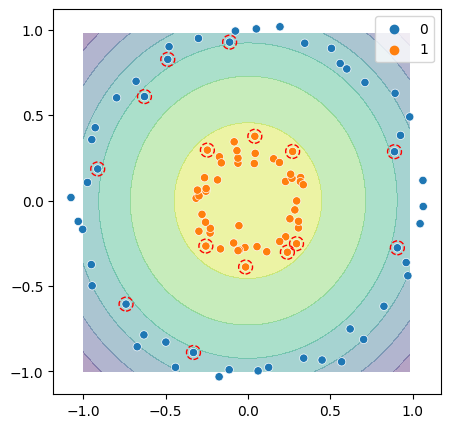

In [21]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X_circle, y_circle = make_circles(n_samples=100, factor=0.3, noise=0.05, random_state=123)

plt.figure(figsize=(5, 5))

xx, yy = np.meshgrid(np.arange(-1, 1, 0.02),
                     np.arange(-1, 1, 0.02))

# Í∞Å Ï†êÏóê ÎåÄÌïú ÏòàÏ∏°Í∞í Í≥ÑÏÇ∞
Z = clf_svm.decision_function(np.c_[xx.ravel(), yy.ravel()])

# ÏòàÏ∏° Í≤∞Í≥ºÎ•º ÏãúÍ∞ÅÌôî
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)

sns.scatterplot(x = X_circle[:, 0], y=X_circle[:, 1], hue=y_circle)

plt.scatter(clf_svm.support_vectors_[:, 0], clf_svm.support_vectors_[:, 1], 
            s=100, color='r', facecolors='none', label='Support vectors',  linestyle='--')
plt.show()

**[Ex.4]** 

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

df_geneÎ•º trainÏù¥ True Î©¥ df_gene_train, FalseÎ©¥ df_gene_testÎ°ú ÎÇòÎàïÎãàÎã§.

df_gene_trainÏóêÏÑú cancer(target)ÏúºÎ°ú ÏûÖÎ†• Î≥ÄÏàò Î≥ÑÎ°ú t-ÎèÖÎ¶ΩÏÑ± Í≤ÄÏ†ïÏùÑ Ìï©ÎãàÎã§(Ïù¥Î∂ÑÏÇ∞ÏùÑ Í∞ÄÏ†ïÌï©ÎãàÎã§). 
    
Í≤ÄÏ†ï ÌÜµÍ≥ÑÎüâÏùò Ï†àÎåÄÍ∞íÏù¥ ÌÅ∞ Î≥ÄÏàòÎ•º Ïö∞ÏÑ†Ï†ÅÏúºÎ°ú 1~200Í∞ú ÏÑ†ÌÉùÌï©ÎãàÎã§. ÏÑ†ÌÉùÌïú Í∞úÏàòÎ≥ÑÎ°ú Î°úÏßÄÏä§Ìã± ÌöåÍ∑ÄÎ∂ÑÏÑùÍ≥º Linear SVMÏùò ÏÑ±Îä•ÏùÑ ÎπÑÍµêÌï¥Î¥ÖÎãàÎã§.

ÏÑ±Îä• ÎπÑÍµêÎäî df_gene_trainÏúºÎ°ú ÌïôÏäµÏùÑ ÏãúÌÇ§Í≥† df_gene_testÎ°ú ÌèâÍ∞ÄÎ•º ÌïòÏó¨ ÌèâÍ∞ÄÏÖãÏóêÏÑúÏùò ÏÑ±Îä•ÏùÑ Î¥ÖÎãàÎã§. 

ÏÑ±Îä• ÏßÄÌëú: Ï†ïÌôïÎèÑ(Accuracy)
    
</div>

In [22]:
from sklearn.metrics import accuracy_score
from scipy.stats import ttest_ind

X_all = [i for i in df_gene.columns if i != 'cancer' and i != 'train']

def get_corr(X, y):
    scores, pvalues = list(), list() 
    # ÏûÖÎ†• Î≥ÄÏàò XÏùò Í∞Å Î≥ÄÏàòÎì§Ïùò ÎåÄÏÉÅ Î≥ÄÏàòÏùò Í∞íÏù¥ AML, ALLÎ°ú Íµ¨Î∂ÑÌñàÏùÑ ÎïåÏùò t Í≤ÄÏ†ïÏùÑ ÏàòÌñâÌï©ÎãàÎã§. Ïù¥ Îïå Îì±Î∂ÑÏÇ∞Ïù¥ ÏïÑÎãàÎùºÍ≥† ÏÑ§Ï†ïÌï©ÎãàÎã§.
    stat, pval  = ttest_ind(X[y == 'AML'], X[y == 'ALL'], equal_var=False)
    return np.abs(stat), pval

stat, pval = get_corr(df_gene[X_all], df_gene['cancer'])

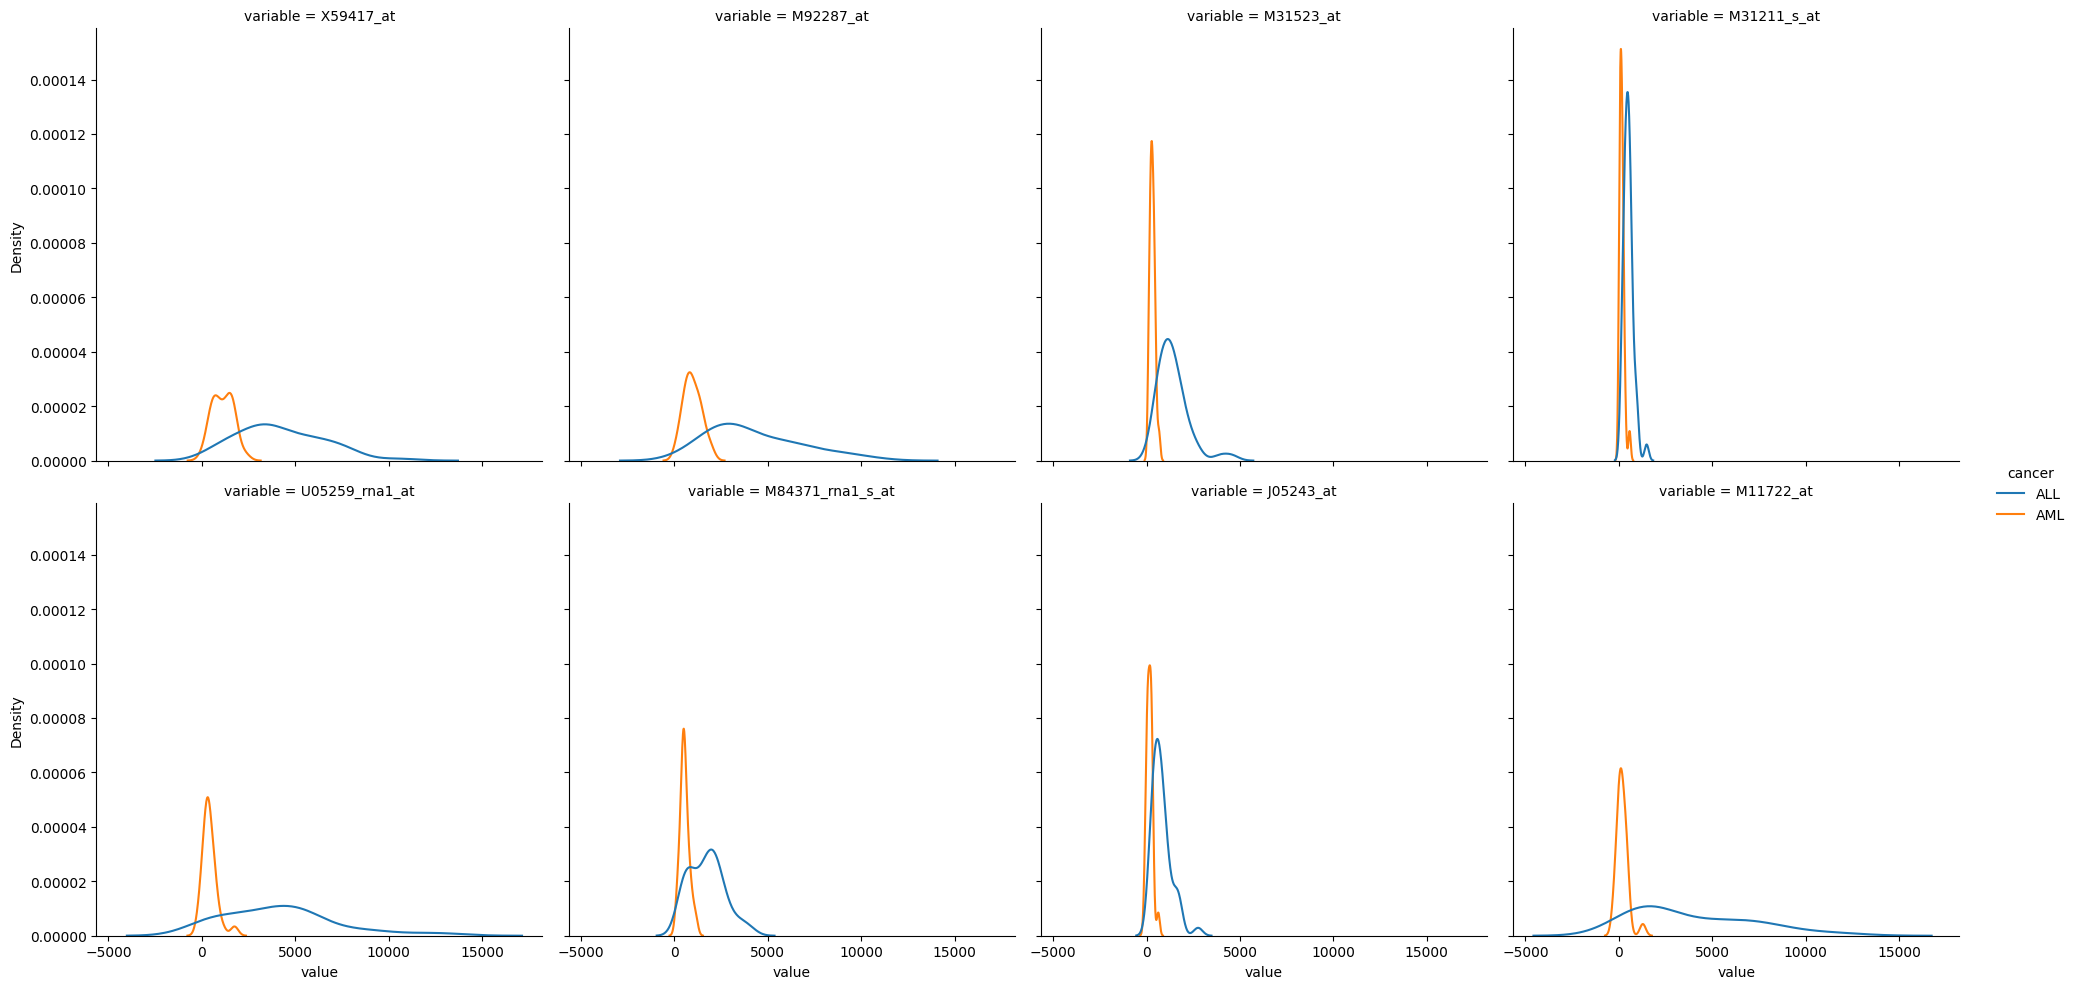

In [23]:
# t-ÎèÖÎ¶ΩÏÑ± Í≤ÄÏ†ïÏùò pvalue Ï†àÎåÄÍ∞íÎ•º Í∏∞Ï§ÄÏúºÎ°ú ÏÉÅÏúÑ 8Í∞úÏùò Î≥ÄÏàòÎì§Ïùò Î∂ÑÌè¨Î•º Kernel Density Ï∞®Ìä∏Î°ú ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§.
sns.displot(
    data=pd.concat([df_gene.iloc[:, np.argsort(pval)[:8]], df_gene['cancer']], axis=1).melt(id_vars='cancer'), 
    x='value', col='variable', col_wrap=4, hue='cancer', kind='kde'
)
plt.show()

In [24]:
df_gene_train = df_gene.loc[df_gene['train'] == True]
df_gene_test = df_gene.loc[df_gene['train'] == False]
feat_num = np.arange(1, 201)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


lr_train_scores = list()
lr_test_scores = list()
# ÏÑ†ÌÉùÌïú Î≥ÄÏàòÏóê ÏàòÏóê Îî∞Î•∏ ÌèâÍ∞Ä ÏÑ±Îä•ÏùÑ Ï∏°Ï†ïÌï©ÎãàÎã§.
for i in feat_num:
    # 1. SelectKBest  Ï≤òÎ¶¨Í∏∞Î•º ÌÜµÌï¥ tÍ≤ÄÏ†ïÏùò pvalue  Ï†àÎåÄÍ∞íÏùÑ Í∏∞Ï§ÄÏúºÎ°ú ÏÉÅÏúÑ iÍ∞ú ÎßåÌÅº Î≥ÄÏàòÎ•º ÏÑ†ÌÉùÌï©ÎãàÎã§.
    # 2. ÌëúÏ§ÄÌôîÌï©ÎãàÎã§.
    # 3. Î°úÏßÄÏä§Ìã± ÌöåÍ∑ÄÎ™®Îç∏ÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.
    reg_lr_kbest = make_pipeline(
        SelectKBest(get_corr, k=i),
        StandardScaler(),
        LogisticRegression(solver='lbfgs')
    )

    reg_lr_kbest.fit(df_gene_train[X_all], df_gene_train['cancer'])
    lr_train_scores.append(
        accuracy_score(df_gene_train['cancer'], reg_lr_kbest.predict(df_gene_train[X_all]))
    )
    lr_test_scores.append(
        accuracy_score(df_gene_test['cancer'], reg_lr_kbest.predict(df_gene_test[X_all]))
    )

In [26]:
lsvm_train_scores = list()
lsvm_test_scores = list()
# ÏÑ†ÌÉùÌïú Î≥ÄÏàòÏóê ÏàòÏóê Îî∞Î•∏ ÌèâÍ∞Ä ÏÑ±Îä•ÏùÑ Ï∏°Ï†ïÌï©ÎãàÎã§.
for i in feat_num:
    # 1. SelectKBest  Ï≤òÎ¶¨Í∏∞Î•º ÌÜµÌï¥ tÍ≤ÄÏ†ïÏùò pvalue  Ï†àÎåÄÍ∞íÏùÑ Í∏∞Ï§ÄÏúºÎ°ú ÏÉÅÏúÑ iÍ∞ú ÎßåÌÅº Î≥ÄÏàòÎ•º ÏÑ†ÌÉùÌï©ÎãàÎã§.
    # 2. ÌëúÏ§ÄÌôîÌï©ÎãàÎã§.
    # 3. ÏÑ†Ìòï Ïª§ÎÑêÏùò SVMÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.
    reg_lsvm_kbest = make_pipeline(
        SelectKBest(get_corr, k=i),
        StandardScaler(),
        LinearSVC(C=1000)
    )

    reg_lsvm_kbest.fit(df_gene_train[X_all], df_gene_train['cancer'])
    lsvm_train_scores.append(
        accuracy_score(df_gene_train['cancer'], reg_lsvm_kbest.predict(df_gene_train[X_all]))
    )
    lsvm_test_scores.append(
        accuracy_score(df_gene_test['cancer'], reg_lsvm_kbest.predict(df_gene_test[X_all]))
    )

c:\users\user\python3.7\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [27]:
# Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏Í≥º, Linear SVMÍ≥ºÏùò ÏÑ±Îä•ÏùÑ ÏãúÍ∞ÅÌôîÌïòÏó¨ ÎπÑÍµêÌï©ÎãàÎã§.
plt.figure(figsize=(6, 3))
plt.plot(feat_num, lr_test_scores, label='Logistic Regression')
plt.plot(feat_num, lsvm_test_scores, label='Linear SVM')
plt.ylabel("Accuracy")
plt.xlabel("Number of selected variables")
plt.title("Accuracy of test")
plt.legend()
plt.show()

## Support Vector Machine Îã§Ï§ë ÌÅ¥ÎûòÏä§ Î∂ÑÎ•ò 

Support Vector Machine Î∂ÑÎ•ò Î™®Îç∏ÏùÑ Ïù¥ÏßÑ Î∂ÑÎ•òÎßå Í∞ÄÎä•Ìï©ÎãàÎã§.

Ïù¥Î•º Îã§Ï§ë Î∂ÑÎ•òÏóê Ï†ÅÏö©ÌïòÍ∏∞ ÏúÑÌï¥ÏÑúÎäî Ïù¥ÏßÑ Î∂ÑÎ•òÍ∏∞Î•º Ïó¨Îü¨ Í∞ú ÎßåÎì§Í≥†, Í≤∞Í≥ºÎ•º Ï¢ÖÌï©ÏùÑ Ìï¥Ïïº ÌåêÎ≥Ñ Í≤∞Í≥ºÎ•º ÎÉÖÎãàÎã§. 

### One-vs-One

Îëê Í∞úÏùò ÌÅ¥ÎûòÏä§Î°ú ÏßùÏùÑ ÏßÄÏñ¥ Ïù¥ÏßÑ Î∂ÑÎ•ò Î™®Îç∏ÏùÑ ÌïôÏäµÌï©ÎãàÎã§. Ïù¥ÏßÑ Î∂ÑÎ•òÍ∏∞Îäî Îëê Í∞úÏùò ÌÅ¥ÎûòÏä§Î•º ÎΩëÎäî Í≤ΩÏö∞Ïùò Ïàò ÎßåÌÅº ÏÉùÍπÅÎãàÎã§. ($n(n - 1) / 2$, $n$: ÌÅ¥ÎûòÏä§ Ïàò). 

ÌïôÏäµÌïú Ïù¥ÏßÑ Î∂ÑÎ•òÍ∏∞Îì§Î°ú ÏòàÏ∏°ÌïòÍ≥† Í∞ÄÏû• ÎßéÏùÄ Î∂ÑÎ•òÎ•º ÏñªÏùÄ ÌÅ¥ÎûòÏä§Î•º ÏÑ†Ï†ïÌï©ÎãàÎã§. 

ÎèôÏàòÍ∞Ä ÎÇòÏôîÏùÑ Í≤ΩÏö∞ Î∂ÑÎ•ò ÎßàÏßÑÏù¥ ÌÅ∞ ÌÅ¥ÎûòÏä§Î•º ÏÑ†ÌÉùÌï©ÎãàÎã§.

image.png


Ïù¥ÎØ∏ÏßÄ Ï∂úÏ≤ò: https://towardsdatascience.com/multi-class-classification-one-vs-all-one-vs-one-94daed32a87b

### One-vs-Rest

ÌïòÎÇòÏùò ÌÅ¥ÎûòÏä§Î•º ÏÑ†Ï†ïÌïòÏó¨ Positive ÌÅ¥ÎûòÏä§, ÎÇòÎ®∏ÏßÄÎ•º Negative ÌÅ¥ÎûòÏä§Î°ú ÏßÄÏ†ïÌïòÏó¨, Í∞Å ÌÅ¥ÎûòÏä§Î•º Ìïú Î≤àÏî© Positive ÌÅ¥ÎûòÏä§ÌïòÏó¨ Ïù¥ÏßÑ Î∂ÑÎ•ò Î™®Îç∏ÏùÑ ÎßåÎì≠ÎãàÎã§. 


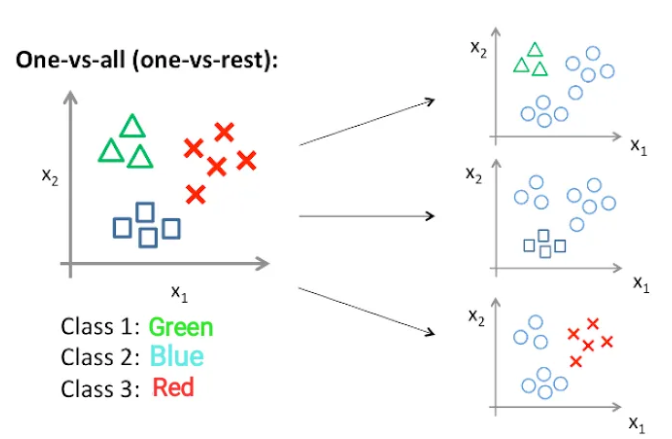

Ïù¥ÎØ∏ÏßÄ Ï∂úÏ≤ò: https://towardsdatascience.com/multi-class-classification-one-vs-all-one-vs-one-94daed32a87b

sklearn.svm.SVCÎäî one-vs-one Î∞©ÏãùÏúºÎ°ú Íµ¨ÌòÑÎêòÏñ¥ ÏûàÏäµÎãàÎã§.

sklearn.svm.SVC Í∞ÄÏù¥Îìú Î∞úÏ∑å
```
The multiclass support is handled according to a one-vs-one scheme.
```

## SVMÏùò Ïû•Îã®Ï†ê 

### Ïû•Ï†ê

- Í≥†Ï∞®Ïõê Í≥µÍ∞ÑÏóêÏÑú Ìö®Í≥ºÏ†ÅÏù∏ Î∂ÑÎ•òÎ•º Ìï©ÎãàÎã§.


- Î∂ÑÎ•ò ÎßàÏßÑ ÏµúÎåÄÌôîÎ•º ÌïôÏäµÏùò Î™©ÌëúÏ†êÏùÑ ÌïúÎã§Îäî Ï†êÏùÄ Î≥¥Îã§ Ï¢ãÏùÄ ÏùºÎ∞òÌôî ÏÑ±Îä•ÏùÑ Í∏∞ÎåÄÌï† Ïàò ÏûàÎäî Í∑ºÍ±∞Í∞Ä Îê©ÎãàÎã§.


- Ïª§ÎÑê Ìä∏Î¶≠ÏùÑ ÌÜµÌïú Îã§ÏñëÌïú Ïú†ÌòïÏùò ÎπÑÏÑ†Ìòï Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÏùëÏù¥ Í∞ÄÎä•Ìï©ÎãàÎã§.


- Î™®Îç∏Ïùò Î≥µÏû°ÎèÑÎ•º Ï†úÏñ¥ Í∞ÄÎä•Ìï©ÎãàÎã§.

### Îã®Ï†ê

- ÌïôÏäµÏãú Î≥µÏû°Ìïú ÏµúÏ†ÅÌôî Í≥ºÏ†ïÍ≥º, ÏòàÏ∏°Ïãú, Kernel Í∏∞Î∞òÏùò SVMÏùÄ Support VectorÏóê ÎπÑÎ°ÄÌïú Ïó∞ÏÇ∞ ÏûêÏõêÏù¥ ÌïÑÏöîÌïòÎã§Îäî Ï†êÏóêÏÑú Í≥ÑÏÇ∞ ÎπÑÏö©Ïù¥ ÎÜíÏäµÎãàÎã§.


- Î™®Îç∏Ïùò Ìï¥ÏÑùÏù¥ Ïñ¥Î†µÏäµÎãàÎã§.